In [1]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [18]:
# Paths to dataset directories
train_dir = r"C:\Users\COMPUMARTS\Downloads\New\Split\train"
validate_dir = r"C:\Users\COMPUMARTS\Downloads\New\Split\validate"
test_dir = r"C:\Users\COMPUMARTS\Downloads\New\Split\test"

In [40]:
img_size = (299, 299)  # Required for Xception
batch_size = 32
learning_rate = 0.001
num_classes = 5  # Number of categories
epochs = 10

In [41]:
def check_image_sizes(directory):
    print(f"Checking image sizes in directory: {directory}")
    for category in os.listdir(directory):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            for img_file in os.listdir(category_path):
                img_path = os.path.join(category_path, img_file)
                try:
                    with Image.open(img_path) as img:
                        print(f"{img_file} - Size: {img.size}")
                except Exception as e:
                    print(f"Error with image {img_file}: {e}")

In [21]:
check_image_sizes(train_dir)

Checking image sizes in directory: C:\Users\COMPUMARTS\Downloads\New\Split\train
Image_100.png - Size: (256, 256)
Image_100_1.png - Size: (256, 256)
Image_100_2.png - Size: (256, 256)
Image_100_3.png - Size: (256, 256)
Image_101.png - Size: (256, 256)
Image_101_1.png - Size: (256, 256)
Image_101_2.png - Size: (256, 256)
Image_101_3.png - Size: (256, 256)
Image_102.png - Size: (256, 256)
Image_102_1.png - Size: (256, 256)
Image_102_2.png - Size: (256, 256)
Image_102_3.png - Size: (256, 256)
Image_103_1.png - Size: (256, 256)
Image_104.png - Size: (256, 256)
Image_104_2.png - Size: (256, 256)
Image_104_3.png - Size: (256, 256)
Image_105.png - Size: (256, 256)
Image_105_1.png - Size: (256, 256)
Image_105_3.png - Size: (256, 256)
Image_106.png - Size: (256, 256)
Image_106_2.png - Size: (256, 256)
Image_106_3.png - Size: (256, 256)
Image_107.png - Size: (256, 256)
Image_107_1.png - Size: (256, 256)
Image_107_2.png - Size: (256, 256)
Image_107_3.png - Size: (256, 256)
Image_108.png - Size: (

Image_177_2.png - Size: (256, 256)
Image_177_3.png - Size: (256, 256)
Image_178_1.png - Size: (256, 256)
Image_178_2.png - Size: (256, 256)
Image_178_3.png - Size: (256, 256)
Image_17_1.png - Size: (256, 256)
Image_17_2.png - Size: (256, 256)
Image_17_3.png - Size: (256, 256)
Image_18.png - Size: (256, 256)
Image_180.png - Size: (256, 256)
Image_180_2.png - Size: (256, 256)
Image_180_3.png - Size: (256, 256)
Image_181.png - Size: (256, 256)
Image_181_1.png - Size: (256, 256)
Image_181_2.png - Size: (256, 256)
Image_181_3.png - Size: (256, 256)
Image_182.png - Size: (256, 256)
Image_182_1.png - Size: (256, 256)
Image_182_2.png - Size: (256, 256)
Image_182_3.png - Size: (256, 256)
Image_183.png - Size: (256, 256)
Image_183_1.png - Size: (256, 256)
Image_183_2.png - Size: (256, 256)
Image_183_3.png - Size: (256, 256)
Image_184.png - Size: (256, 256)
Image_184_1.png - Size: (256, 256)
Image_184_2.png - Size: (256, 256)
Image_184_3.png - Size: (256, 256)
Image_185.png - Size: (256, 256)
Ima

Image_31_1.png - Size: (256, 256)
Image_31_2.png - Size: (256, 256)
Image_31_3.png - Size: (256, 256)
Image_32_2.png - Size: (256, 256)
Image_32_3.png - Size: (256, 256)
Image_33.png - Size: (256, 256)
Image_33_1.png - Size: (256, 256)
Image_33_2.png - Size: (256, 256)
Image_33_3.png - Size: (256, 256)
Image_34.png - Size: (256, 256)
Image_35.png - Size: (256, 256)
Image_35_1.png - Size: (256, 256)
Image_35_2.png - Size: (256, 256)
Image_36.png - Size: (256, 256)
Image_36_1.png - Size: (256, 256)
Image_36_2.png - Size: (256, 256)
Image_36_3.png - Size: (256, 256)
Image_37_1.png - Size: (256, 256)
Image_37_2.png - Size: (256, 256)
Image_37_3.png - Size: (256, 256)
Image_38.png - Size: (256, 256)
Image_38_1.png - Size: (256, 256)
Image_38_3.png - Size: (256, 256)
Image_39_1.png - Size: (256, 256)
Image_39_2.png - Size: (256, 256)
Image_39_3.png - Size: (256, 256)
Image_3_1.png - Size: (256, 256)
Image_3_2.png - Size: (256, 256)
Image_3_3.png - Size: (256, 256)
Image_4.png - Size: (256, 2

Image_119_3.png - Size: (256, 256)
Image_11_1.png - Size: (256, 256)
Image_11_2.png - Size: (256, 256)
Image_11_3.png - Size: (256, 256)
Image_12.png - Size: (256, 256)
Image_120.png - Size: (256, 256)
Image_120_1.png - Size: (256, 256)
Image_120_2.png - Size: (256, 256)
Image_121_1.png - Size: (256, 256)
Image_121_2.png - Size: (256, 256)
Image_121_3.png - Size: (256, 256)
Image_122_1.png - Size: (256, 256)
Image_122_3.png - Size: (256, 256)
Image_123.png - Size: (256, 256)
Image_123_1.png - Size: (256, 256)
Image_123_2.png - Size: (256, 256)
Image_123_3.png - Size: (256, 256)
Image_124.png - Size: (256, 256)
Image_124_1.png - Size: (256, 256)
Image_125_1.png - Size: (256, 256)
Image_125_2.png - Size: (256, 256)
Image_125_3.png - Size: (256, 256)
Image_126.png - Size: (256, 256)
Image_126_1.png - Size: (256, 256)
Image_126_2.png - Size: (256, 256)
Image_126_3.png - Size: (256, 256)
Image_127_1.png - Size: (256, 256)
Image_127_3.png - Size: (256, 256)
Image_128.png - Size: (256, 256)
I

Image_191_3.png - Size: (256, 256)
Image_192.png - Size: (256, 256)
Image_192_1.png - Size: (256, 256)
Image_192_2.png - Size: (256, 256)
Image_192_3.png - Size: (256, 256)
Image_193.png - Size: (256, 256)
Image_193_1.png - Size: (256, 256)
Image_193_2.png - Size: (256, 256)
Image_193_3.png - Size: (256, 256)
Image_194.png - Size: (256, 256)
Image_194_1.png - Size: (256, 256)
Image_194_2.png - Size: (256, 256)
Image_194_3.png - Size: (256, 256)
Image_195.png - Size: (256, 256)
Image_195_1.png - Size: (256, 256)
Image_195_2.png - Size: (256, 256)
Image_195_3.png - Size: (256, 256)
Image_196.png - Size: (256, 256)
Image_196_1.png - Size: (256, 256)
Image_196_3.png - Size: (256, 256)
Image_197.png - Size: (256, 256)
Image_197_1.png - Size: (256, 256)
Image_197_2.png - Size: (256, 256)
Image_197_3.png - Size: (256, 256)
Image_198_1.png - Size: (256, 256)
Image_198_2.png - Size: (256, 256)
Image_198_3.png - Size: (256, 256)
Image_199.png - Size: (256, 256)
Image_199_1.png - Size: (256, 256)

Image_11_1.png - Size: (256, 256)
Image_11_2.png - Size: (256, 256)
Image_11_3.png - Size: (256, 256)
Image_12.png - Size: (256, 256)
Image_120.png - Size: (256, 256)
Image_120_1.png - Size: (256, 256)
Image_120_3.png - Size: (256, 256)
Image_121.png - Size: (256, 256)
Image_121_1.png - Size: (256, 256)
Image_121_3.png - Size: (256, 256)
Image_122.png - Size: (256, 256)
Image_122_2.png - Size: (256, 256)
Image_122_3.png - Size: (256, 256)
Image_123.png - Size: (256, 256)
Image_123_1.png - Size: (256, 256)
Image_123_2.png - Size: (256, 256)
Image_123_3.png - Size: (256, 256)
Image_124.png - Size: (256, 256)
Image_124_1.png - Size: (256, 256)
Image_124_3.png - Size: (256, 256)
Image_125.png - Size: (256, 256)
Image_125_1.png - Size: (256, 256)
Image_125_2.png - Size: (256, 256)
Image_126.png - Size: (256, 256)
Image_126_1.png - Size: (256, 256)
Image_126_3.png - Size: (256, 256)
Image_127.png - Size: (256, 256)
Image_127_1.png - Size: (256, 256)
Image_127_3.png - Size: (256, 256)
Image_1

Image_30_3.png - Size: (256, 256)
Image_31_2.png - Size: (256, 256)
Image_31_3.png - Size: (256, 256)
Image_32.png - Size: (256, 256)
Image_32_1.png - Size: (256, 256)
Image_32_2.png - Size: (256, 256)
Image_32_3.png - Size: (256, 256)
Image_33.png - Size: (256, 256)
Image_33_1.png - Size: (256, 256)
Image_33_3.png - Size: (256, 256)
Image_34.png - Size: (256, 256)
Image_34_1.png - Size: (256, 256)
Image_34_2.png - Size: (256, 256)
Image_34_3.png - Size: (256, 256)
Image_35.png - Size: (256, 256)
Image_35_1.png - Size: (256, 256)
Image_35_2.png - Size: (256, 256)
Image_35_3.png - Size: (256, 256)
Image_36.png - Size: (256, 256)
Image_36_1.png - Size: (256, 256)
Image_36_2.png - Size: (256, 256)
Image_36_3.png - Size: (256, 256)
Image_37.png - Size: (256, 256)
Image_37_1.png - Size: (256, 256)
Image_37_2.png - Size: (256, 256)
Image_38.png - Size: (256, 256)
Image_38_1.png - Size: (256, 256)
Image_39.png - Size: (256, 256)
Image_39_1.png - Size: (256, 256)
Image_39_2.png - Size: (256, 2

Image_165_4.png - Size: (256, 256)
Image_166_4.png - Size: (256, 256)
Image_167.png - Size: (256, 256)
Image_167_1.png - Size: (256, 256)
Image_167_2.png - Size: (256, 256)
Image_167_4.png - Size: (256, 256)
Image_168.png - Size: (256, 256)
Image_168_2.png - Size: (256, 256)
Image_169.png - Size: (256, 256)
Image_169_1.png - Size: (256, 256)
Image_169_3.png - Size: (256, 256)
Image_16_2.png - Size: (256, 256)
Image_16_4.png - Size: (256, 256)
Image_17.png - Size: (256, 256)
Image_170_1.png - Size: (256, 256)
Image_170_2.png - Size: (256, 256)
Image_170_3.png - Size: (256, 256)
Image_170_4.png - Size: (256, 256)
Image_171_1.png - Size: (256, 256)
Image_171_2.png - Size: (256, 256)
Image_171_3.png - Size: (256, 256)
Image_172_1.png - Size: (256, 256)
Image_172_2.png - Size: (256, 256)
Image_172_3.png - Size: (256, 256)
Image_172_4.png - Size: (256, 256)
Image_173.png - Size: (256, 256)
Image_173_2.png - Size: (256, 256)
Image_173_3.png - Size: (256, 256)
Image_173_4.png - Size: (256, 256

Image_56_3.png - Size: (256, 256)
Image_56_4.png - Size: (256, 256)
Image_57.png - Size: (256, 256)
Image_57_2.png - Size: (256, 256)
Image_57_3.png - Size: (256, 256)
Image_58_1.png - Size: (256, 256)
Image_58_2.png - Size: (256, 256)
Image_58_3.png - Size: (256, 256)
Image_59.png - Size: (256, 256)
Image_59_1.png - Size: (256, 256)
Image_59_4.png - Size: (256, 256)
Image_5_1.png - Size: (256, 256)
Image_5_3.png - Size: (256, 256)
Image_5_4.png - Size: (256, 256)
Image_60.png - Size: (256, 256)
Image_60_1.png - Size: (256, 256)
Image_60_3.png - Size: (256, 256)
Image_60_4.png - Size: (256, 256)
Image_61.png - Size: (256, 256)
Image_61_1.png - Size: (256, 256)
Image_61_2.png - Size: (256, 256)
Image_61_4.png - Size: (256, 256)
Image_62_2.png - Size: (256, 256)
Image_62_4.png - Size: (256, 256)
Image_63_2.png - Size: (256, 256)
Image_63_3.png - Size: (256, 256)
Image_63_4.png - Size: (256, 256)
Image_64_2.png - Size: (256, 256)
Image_64_3.png - Size: (256, 256)
Image_65.png - Size: (256

Image_17_3.png - Size: (256, 256)
Image_18.png - Size: (256, 256)
Image_180.png - Size: (256, 256)
Image_180_1.png - Size: (256, 256)
Image_180_2.png - Size: (256, 256)
Image_180_3.png - Size: (256, 256)
Image_181_1.png - Size: (256, 256)
Image_181_2.png - Size: (256, 256)
Image_181_3.png - Size: (256, 256)
Image_182.png - Size: (256, 256)
Image_182_1.png - Size: (256, 256)
Image_182_2.png - Size: (256, 256)
Image_183.png - Size: (256, 256)
Image_183_1.png - Size: (256, 256)
Image_183_2.png - Size: (256, 256)
Image_183_3.png - Size: (256, 256)
Image_184.png - Size: (256, 256)
Image_184_1.png - Size: (256, 256)
Image_184_2.png - Size: (256, 256)
Image_184_3.png - Size: (256, 256)
Image_185.png - Size: (256, 256)
Image_185_1.png - Size: (256, 256)
Image_185_2.png - Size: (256, 256)
Image_185_3.png - Size: (256, 256)
Image_186.png - Size: (256, 256)
Image_186_1.png - Size: (256, 256)
Image_186_2.png - Size: (256, 256)
Image_186_3.png - Size: (256, 256)
Image_187.png - Size: (256, 256)
Ima

Image_9.png - Size: (256, 256)
Image_90.png - Size: (256, 256)
Image_90_1.png - Size: (256, 256)
Image_90_2.png - Size: (256, 256)
Image_91.png - Size: (256, 256)
Image_91_1.png - Size: (256, 256)
Image_91_2.png - Size: (256, 256)
Image_91_3.png - Size: (256, 256)
Image_92.png - Size: (256, 256)
Image_92_1.png - Size: (256, 256)
Image_92_3.png - Size: (256, 256)
Image_93_1.png - Size: (256, 256)
Image_93_2.png - Size: (256, 256)
Image_93_3.png - Size: (256, 256)
Image_94.png - Size: (256, 256)
Image_94_1.png - Size: (256, 256)
Image_94_2.png - Size: (256, 256)
Image_95.png - Size: (256, 256)
Image_95_2.png - Size: (256, 256)
Image_96.png - Size: (256, 256)
Image_96_1.png - Size: (256, 256)
Image_96_2.png - Size: (256, 256)
Image_96_3.png - Size: (256, 256)
Image_97_2.png - Size: (256, 256)
Image_97_3.png - Size: (256, 256)
Image_98.png - Size: (256, 256)
Image_98_1.png - Size: (256, 256)
Image_98_2.png - Size: (256, 256)
Image_98_3.png - Size: (256, 256)
Image_99.png - Size: (256, 256)

In [33]:
def display_random_images(directory):
    print(f"Displaying random images from directory: {directory}")
    fig, axes = plt.subplots(1, len(os.listdir(directory)), figsize=(15, 5))
    for i, category in enumerate(os.listdir(directory)):
        category_path = os.path.join(directory, category)
        if os.path.isdir(category_path):
            random_img = random.choice(os.listdir(category_path))
            img_path = os.path.join(category_path, random_img)
            try:
                img = Image.open(img_path)
                axes[i].imshow(img)
                axes[i].set_title(category)
                axes[i].axis("off")
            except Exception as e:
                print(f"Error displaying image {random_img}: {e}")
    plt.show()

Displaying random images from directory: C:\Users\COMPUMARTS\Downloads\New\Split\train


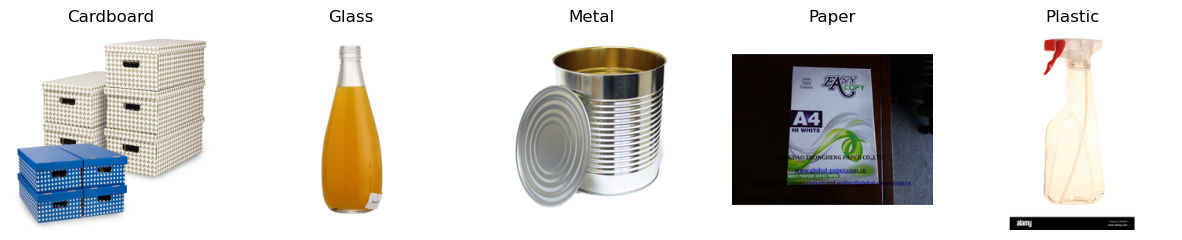

In [34]:
display_random_images(train_dir)

In [35]:
# Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,             # Scale pixel values to [0, 1]
    zoom_range=[0.7, 1.2],         # Random zoom: zoom in and out
    brightness_range=[0.8, 1.2],   # Adjust brightness
    width_shift_range=0.3,         # Horizontal shift
    height_shift_range=0.3,        # Vertical shift
    shear_range=20,                # Shearing to tilt objects
    horizontal_flip=True,          # Flip horizontally
    vertical_flip=False,           # Avoid vertical flip unless needed
    fill_mode="nearest"            # Fill mode for empty pixels after augmentation
)

# Create the train generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=True,  # Shuffle the images for better training
)



Found 4000 images belonging to 5 classes.


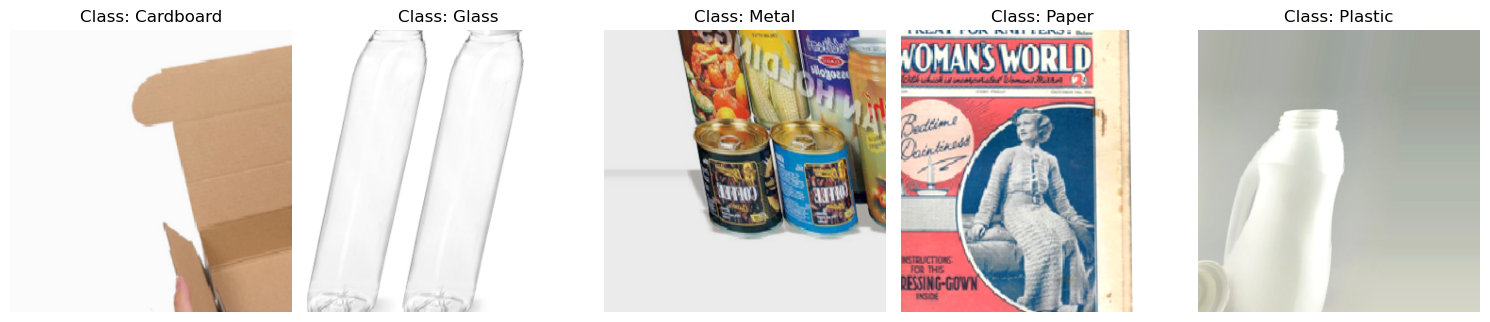

In [36]:
def plot_augmented_images(generator, num_classes=5):
    """
    Plots one preprocessed image from each class after data augmentation.
    """
    class_indices = generator.class_indices
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse class mapping
    fig, axes = plt.subplots(1, num_classes, figsize=(15, 5))
    
    # For each class, find and plot one augmented image
    for class_idx, class_name in class_labels.items():
        for _ in range(50):  # Try to find an image for the given class
            images, labels = next(generator)  # Fetch a batch of augmented images
            for i in range(len(labels)):
                if labels[i][class_idx] == 1:  # Check if this image matches the class
                    axes[class_idx].imshow(images[i])
                    axes[class_idx].set_title(f"Class: {class_name}")
                    axes[class_idx].axis("off")
                    break
            else:
                continue
            break

    plt.tight_layout()
    plt.show()

# Call the function to visualize the augmented images
plot_augmented_images(train_generator, num_classes=len(train_generator.class_indices))

In [27]:
validate_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [37]:
validate_generator = validate_datagen.flow_from_directory(
    validate_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False,
)

Found 500 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [29]:
print(train_generator.class_indices)

{'Cardboard': 0, 'Glass': 1, 'Metal': 2, 'Paper': 3, 'Plastic': 4}


In [38]:
# Build and compile the model
base_model = Xception(weights="imagenet", include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation="relu")(x)
predictions = Dense(num_classes, activation="softmax")(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(optimizer=Adam(learning_rate=learning_rate), loss="categorical_crossentropy", metrics=["accuracy"])


In [42]:
# Train the model
history = model.fit(train_generator, epochs=epochs, validation_data=validate_generator)

Epoch 1/10
125/125 [==============================] - 256s 2s/step - loss: 0.2182 - accuracy: 0.9252 - val_loss: 0.1451 - val_accuracy: 0.9520
Epoch 2/10
125/125 [==============================] - 248s 2s/step - loss: 0.2018 - accuracy: 0.9285 - val_loss: 0.1346 - val_accuracy: 0.9540
Epoch 3/10
125/125 [==============================] - 247s 2s/step - loss: 0.1876 - accuracy: 0.9298 - val_loss: 0.1408 - val_accuracy: 0.9420
Epoch 4/10
125/125 [==============================] - 251s 2s/step - loss: 0.1566 - accuracy: 0.9473 - val_loss: 0.1431 - val_accuracy: 0.9440
Epoch 5/10
125/125 [==============================] - 246s 2s/step - loss: 0.1542 - accuracy: 0.9452 - val_loss: 0.1041 - val_accuracy: 0.9540
Epoch 6/10
125/125 [==============================] - 241s 2s/step - loss: 0.1350 - accuracy: 0.9507 - val_loss: 0.0817 - val_accuracy: 0.9700
Epoch 7/10
125/125 [==============================] - 256s 2s/step - loss: 0.1370 - accuracy: 0.9528 - val_loss: 0.0722 - val_accuracy: 0.9720

In [43]:
# Save the model
model.save("xception_material_classifier.h5")

C:\Users\COMPUMARTS\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import os

# Paths

model_path = "xception_material_classifier.h5"

# Load the trained model
model = load_model(model_path)

# Preprocessing function for testing
def preprocess_image(img_path, target_size=(299, 299)):
    img = Image.open(img_path).convert("RGB")
    img = img.resize(target_size)
    img_array = np.array(img) / 255.0  # Normalize pixel values
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict for a single image
def predict_single_image(model, img_path):
    processed_image = preprocess_image(img_path)
    prediction = model.predict(processed_image)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Get class names
    return class_labels[class_idx], prediction[0][class_idx]


In [51]:
predict_single_image(model, r"C:\Users\COMPUMARTS\Downloads\New\Split\train\Plastic\Image_2_2.png")

1/1 [==============================] - 1s 923ms/step


('Plastic', 1.0)

In [52]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predict on a few random test images
print("Testing random images...")
for i in range(5):  # Test 5 random images
    random_class = random.choice(os.listdir(test_dir))
    random_image = random.choice(os.listdir(os.path.join(test_dir, random_class)))
    random_image_path = os.path.join(test_dir, random_class, random_image)
    predicted_class, confidence = predict_single_image(model, random_image_path)
    print(f"Image: {random_image}, Predicted: {predicted_class}, Confidence: {confidence:.2f}")

16/16 [==============================] - 28s 2s/step - loss: 0.0963 - accuracy: 0.9720
Test Accuracy: 0.97
Testing random images...
1/1 [==============================] - 0s 129ms/step
Image: Image_42_2.png, Predicted: Paper, Confidence: 1.00
1/1 [==============================] - 0s 116ms/step
Image: Image_127_1.png, Predicted: Plastic, Confidence: 1.00
1/1 [==============================] - 0s 120ms/step
Image: Image_102.png, Predicted: Plastic, Confidence: 1.00
1/1 [==============================] - 0s 115ms/step
Image: Image_58.png, Predicted: Plastic, Confidence: 1.00
1/1 [==============================] - 0s 119ms/step
Image: Image_134_3.png, Predicted: Paper, Confidence: 0.98


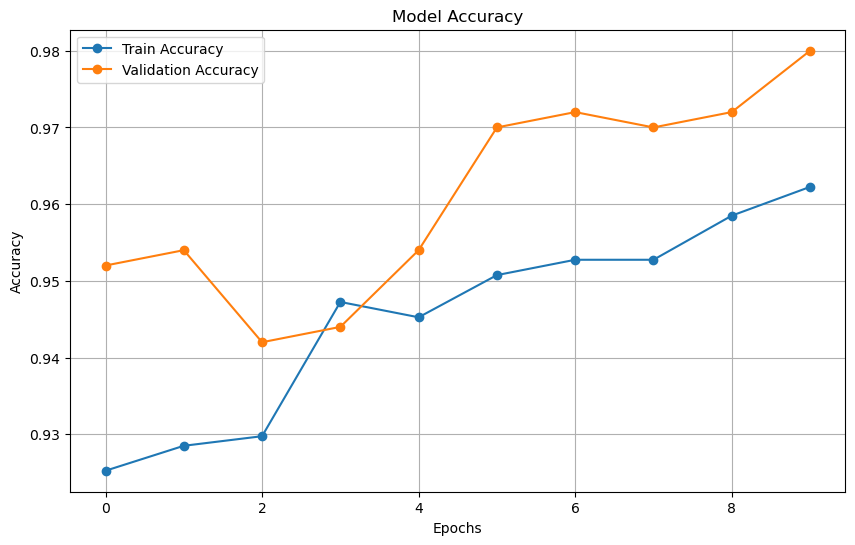

In [44]:
import matplotlib.pyplot as plt

# Assuming `history` is the result of `model.fit`
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


16/16 [==============================] - 27s 2s/step


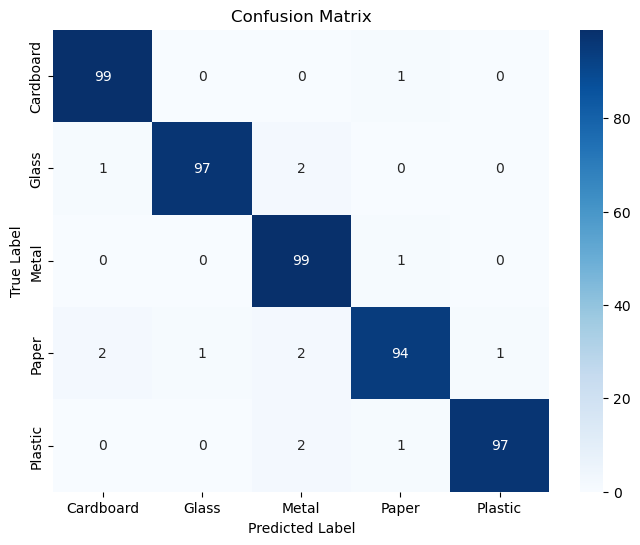

In [45]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming `y_true` and `y_pred` are the true labels and model predictions
y_pred = model.predict(test_generator)  # Replace `test_generator` with your test dataset
y_pred_classes = y_pred.argmax(axis=1)  # Convert probabilities to class indices
y_true = test_generator.classes          # True labels from the generator

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [46]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys(), output_dict=True)

# Extract metrics
precision = report['weighted avg']['precision']
recall = report['weighted avg']['recall']
f1_score = report['weighted avg']['f1-score']

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


Precision: 0.97
Recall: 0.97
F1 Score: 0.97


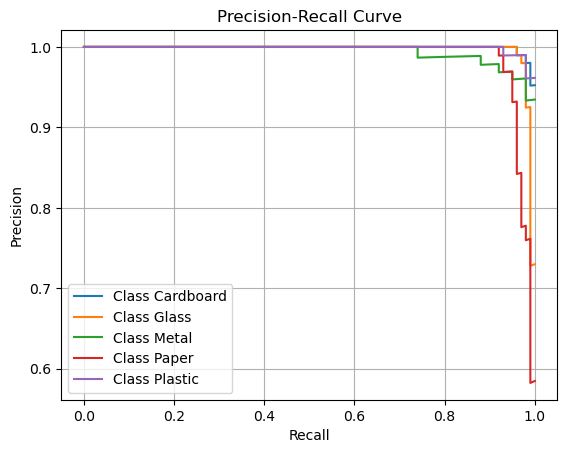

In [47]:
from sklearn.metrics import precision_recall_curve

# Assuming `y_true` and `y_pred` probabilities are available for all classes
for i, class_name in enumerate(test_generator.class_indices.keys()):
    precision, recall, _ = precision_recall_curve(y_true == i, y_pred[:, i])
    plt.plot(recall, precision, label=f"Class {class_name}")

plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()


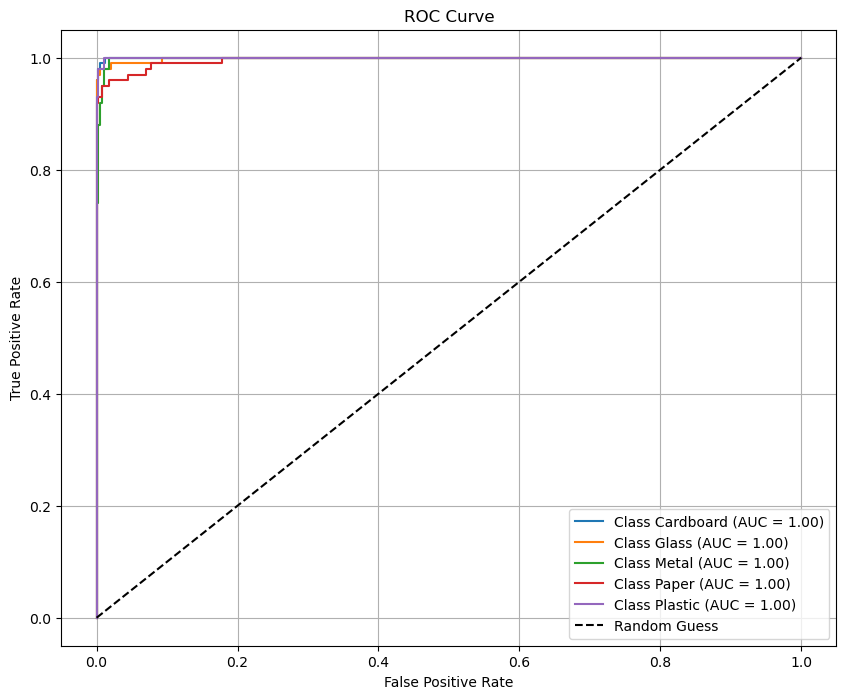

In [48]:
from sklearn.metrics import roc_curve, auc

# Plot ROC Curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(test_generator.class_indices.keys()):
    fpr, tpr, _ = roc_curve(y_true == i, y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {class_name} (AUC = {roc_auc:.2f})")

# Plot random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()
